In [1]:
# from convert_parquet import convert_parquet_files
# import os

# for fn in os.listdir():
#     fn_noext, ext = os.path.splitext(fn)
#     if ext == '.parquet' and not fn_noext.startswith('ppsim'):
#         convert_parquet_files(fn)

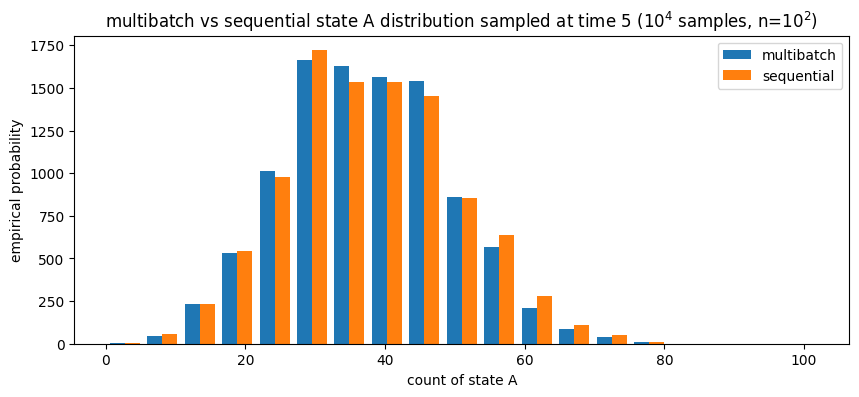

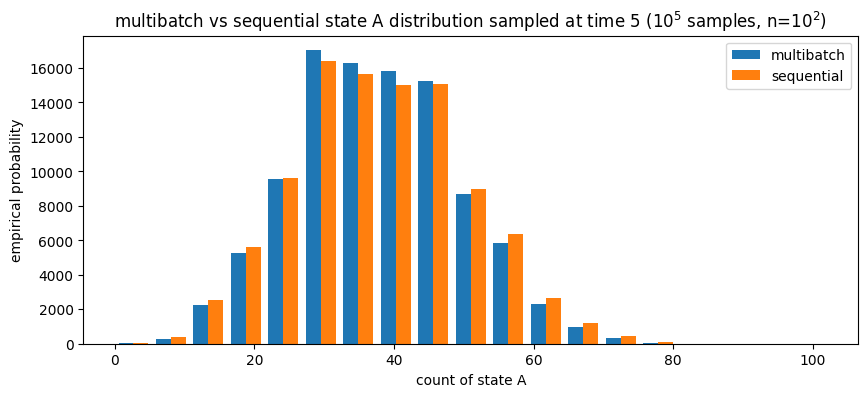

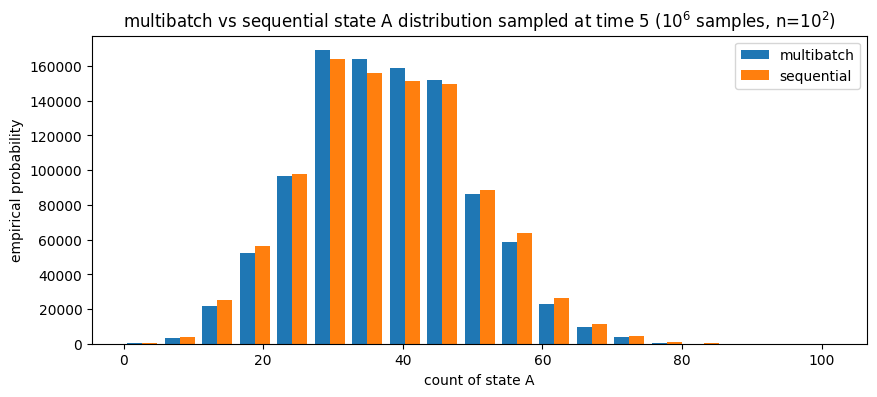

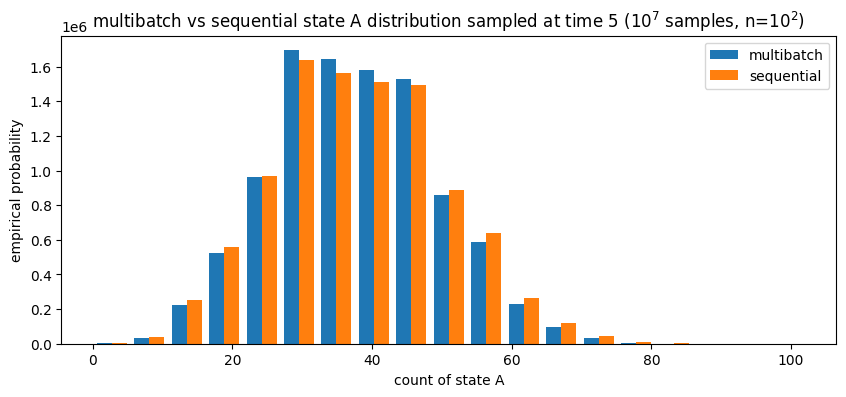

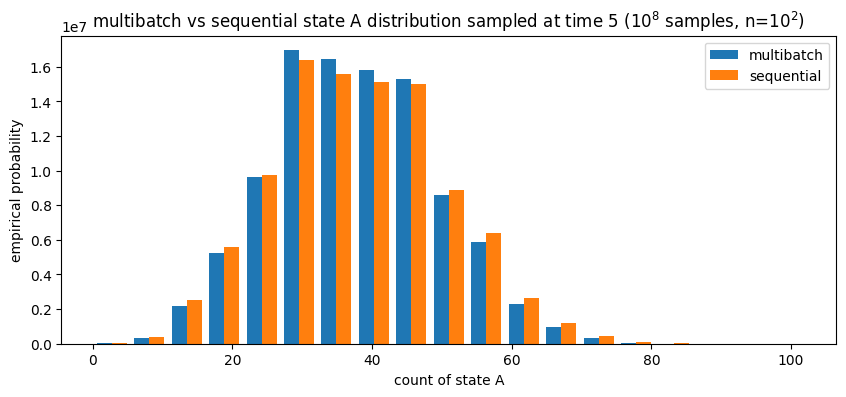

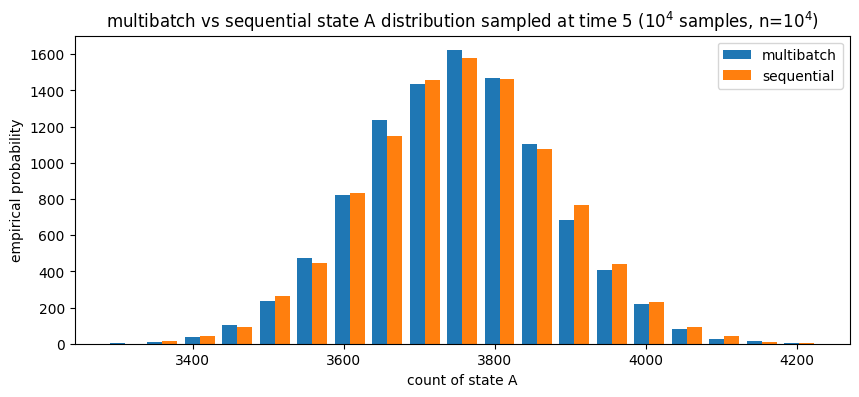

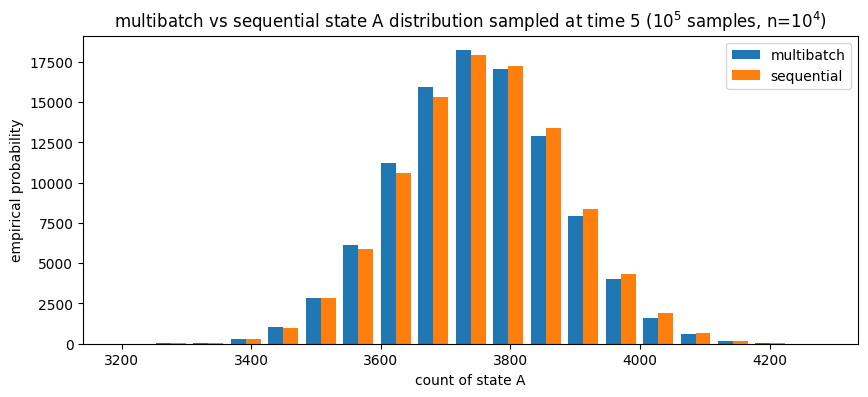

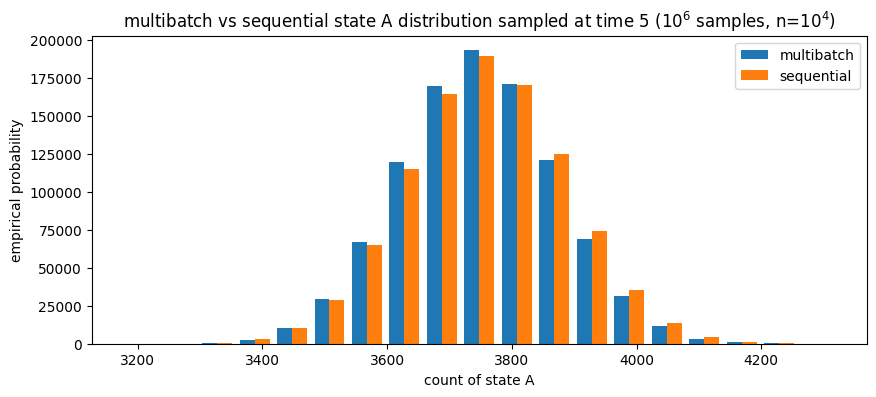

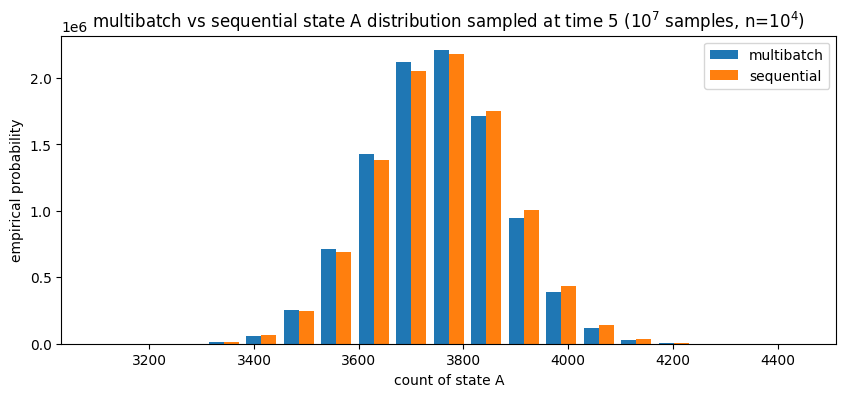

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
import json

def get_values(fn: str, state: str) -> npt.NDArray[np.uint64]:
    with open(fn, 'r') as f:
        data_dict = json.load(f)
    data = {int(val): count for val, count in data_dict[state].items()}
    values = []
    for value, count in data.items():
        values.extend([value] * count)
    return np.array(values, dtype=np.uint64)

def compare(fn1: str, fn2: str, state: str, end_time: int, save: bool = False, fn_append: str = ''):
    simulator1 = fn1[:fn1.index('_')]
    simulator2 = fn2[:fn2.index('_')]
    vals1 = get_values(fn1, state)
    vals2 = get_values(fn2, state)
    min_val = int(min(vals1.min(), vals2.min()))
    max_val = int(min(vals1.max(), vals2.max()))

    
    next_pow_10 = 1
    while next_pow_10 < max_val:
        next_pow_10 *= 10
    
    if min_val <= 0.1 * next_pow_10:
        min_val = 0
    if max_val >= 0.9 * next_pow_10:
        max_val = next_pow_10
    if min_val <= 0.25 * next_pow_10 and max_val >= 0.75 * next_pow_10:
        min_val = 0
        max_val = next_pow_10
    
    fig, ax = plt.subplots(figsize = (10,4))
    bins = np.linspace(min_val, max_val + 2, 20)
    _=ax.hist([vals1, vals2], label=[simulator1, simulator2], bins=bins)
    ax.legend()
    ax.set_xlabel(f'count of state {state}')
    ax.set_ylabel(f'empirical probability')
    ax.set_title(f'{simulator1} vs {simulator2} state {state} distribution sampled at time {end_time} ($10^{trials_exponent}$ samples, n=$10^{pop_exponent}$)')
    if save:
        pdf_fn = f'{simulator1}_vs_{simulator2}{fn_append}.pdf'
        plt.savefig(pdf_fn, bbox_inches='tight')
    plt.show()
    
state = 'A'
end_time = 5


for pop_exponent in [2,4]:
    for trials_exponent in [4,5,6,7,8]:
        if pop_exponent == 4 and trials_exponent == 8:
            break
        exp_str = f'_n10e{pop_exponent}_trials10e{trials_exponent}'
        mb_fn  = f'multibatch_samples{exp_str}_bt-n-over-2.json'
        seq_fn = f'sequential_samples{exp_str}.json'
        compare(mb_fn, seq_fn, state, end_time, save=True, fn_append=f'{exp_str}_bt-n-over-2')
# compare(seq_fn, seq_fn)

bin_centers=array([ 7.85, 15.55, 23.25, 30.95, 38.65, 46.35, 54.05, 61.75, 69.45,
       77.15])


<BarContainer object of 10 artists>

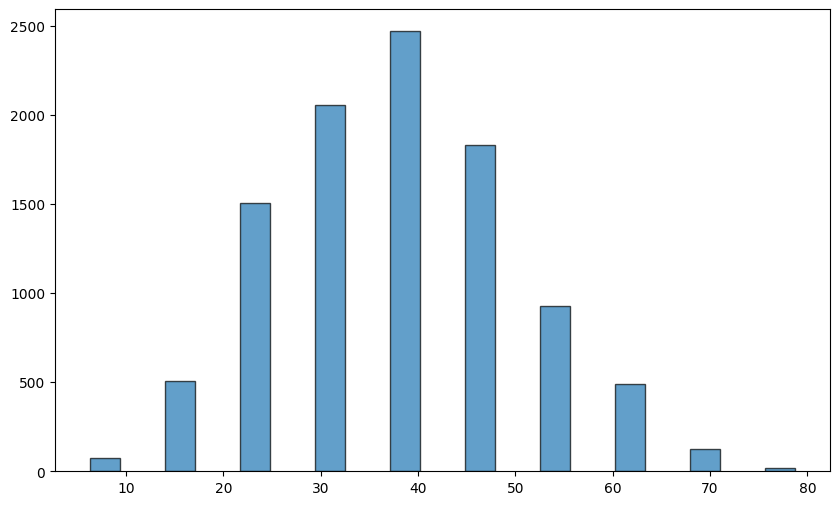

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt


def create_bins(num_bins: int, data_dict: dict[int, int]) -> tuple[npt.NDArray[np.float64], npt.NDArray[np.int64], npt.NDArray]:
    # Extract keys and values
    values = np.array(list(data_dict.keys()), dtype=np.int64)
    counts = np.array(list(data_dict.values()), dtype=np.int64)
    
    # Create bin edges
    min_val = min(values)
    max_val = max(values)
    bin_edges = np.linspace(min_val, max_val, num_bins + 1)
    
    # Initialize bin counts
    bin_counts = np.zeros(num_bins, dtype=np.float64)
    
    # Assign counts to appropriate bins
    for val, count in zip(values, counts):
        # Find which bin this value belongs to
        bin_idx = np.digitize(val, bin_edges) - 1
        # Handle edge case for the maximum value
        if bin_idx == num_bins:
            bin_idx = num_bins - 1
        # Add the count to the appropriate bin
        bin_counts[bin_idx] += count
    
    # Calculate bin centers for plotting
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    return bin_centers, bin_counts, bin_edges

pop_exponent = 2
trials_exponent = 4
import json
from pprint import pp

seq_fn = f'sequential_samples_popsize10e{pop_exponent}_trials10e{trials_exponent}.json'
with open(seq_fn, 'r') as f:
    data = json.load(f)
a_data = {int(a_val): count for a_val, count in data['A'].items()}

bins = 10
bin_centers, bin_counts, bin_edges = create_bins(bins, a_data)

print(f'{bin_centers=}')

plt.figure(figsize=(10, 6))
plt.bar(bin_centers, bin_counts, width=(bin_edges[1] - bin_edges[0]) * 0.4, 
        align='center', alpha=0.7, edgecolor='black')